In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib.gridspec import GridSpec
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



In [46]:
df = pd.read_csv("encoded_data.csv")
#df.drop(columns=['Tên SP'], inplace=True)
df.head()

,Kích thước,Cân nặng,Giá(đ),Nhà sản xuất,Model,Kết nối,Loại switch
0,0.719322,0.405072,3899000,3.362781e+06,1.625106e+06,1.770855e+06,1.561780e+06
1,0.719322,0.405072,2699000,3.362781e+06,1.767535e+06,1.906612e+06,1.868848e+06
2,0.652838,0.560227,6099000,3.362781e+06,1.984702e+06,1.763228e+06,1.868848e+06
3,0.652838,0.560227,5999000,3.362781e+06,2.185041e+06,1.763228e+06,2.036515e+06
4,0.652838,0.560227,5999000,3.362781e+06,1.987087e+06,1.763228e+06,1.868848e+06


Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

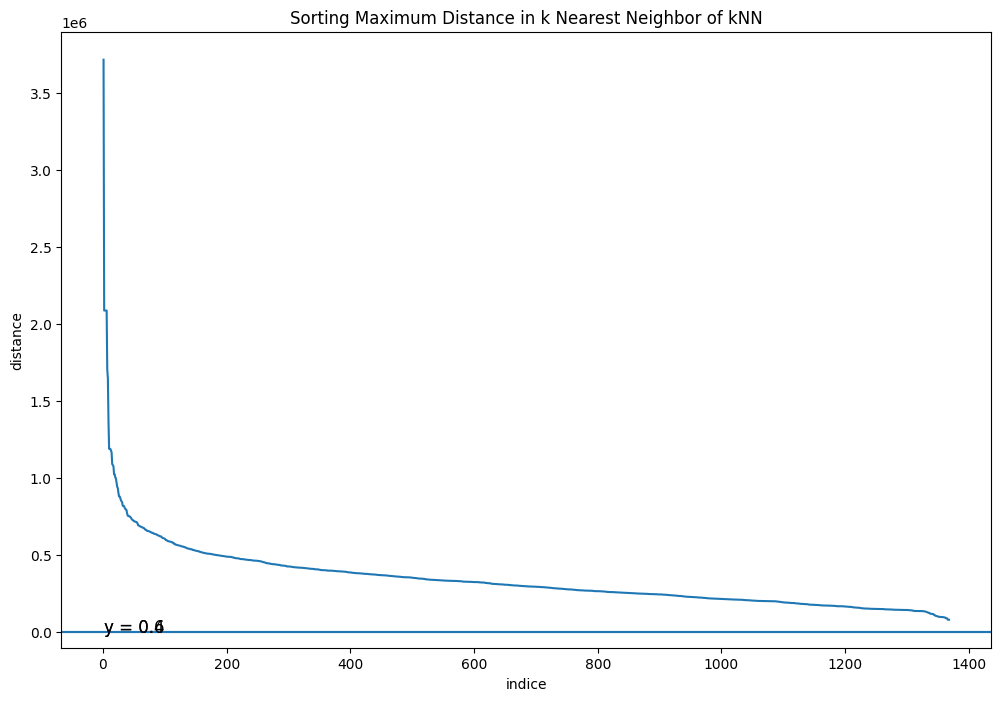

In [43]:
# Xây dựng mô hình k-Means với k=10
neighbors = 10
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(df)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(df)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# Vẽ biểu đồ khoảng cách xa nhất ở trên theo thứ tự giảm dần
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=0.4)
plt.text(2, 0.4, 'y = 0.4', fontsize=12)
plt.axhline(y=0.6)
plt.text(2, 0.6, 'y = 0.6', fontsize=12)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

In [68]:
dbscan = DBSCAN(eps=500000, min_samples=11, metric='euclidean')
labels = dbscan.fit_predict(df)

In [69]:
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

In [53]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df)
print(tsne_results.shape)

(1368, 2)


In [73]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(df)

TypeError: LinearDiscriminantAnalysis.fit() missing 1 required positional argument: 'y'

In [66]:
pca = PCA(n_components=2)

# Huấn luyện mô hình PCA và biến đổi dữ liệu
X_pca = pca.fit_transform(df)

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be finite values


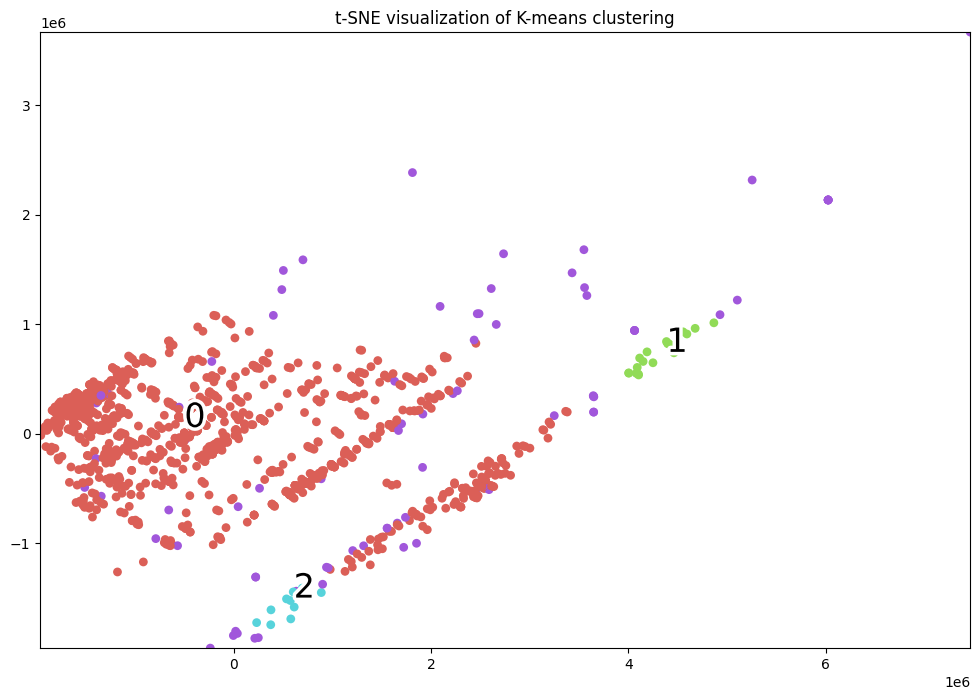

In [70]:

def _plot_kmean_scatter(df, labels):
        '''
        df: dữ liệu đầu vào sau khi giảm chiều bằng t-SNE
        labels: nhãn dự báo từ K-means
        '''
        # Lựa chọn màu sắc
        num_classes = len(np.unique(labels))
        palette = np.array(sns.color_palette("hls", num_classes))

        # Vẽ biểu đồ scatter
        fig = plt.figure(figsize=(12, 8))
        ax = plt.subplot()
        sc = ax.scatter(df[:, 0], df[:, 1], lw=0, s=40, c=palette[labels.astype(int)])
        plt.xlim(df[:, 0].min() - 5, df[:, 0].max() + 5)
        plt.ylim(df[:, 1].min() - 5, df[:, 1].max() + 5)

        # Thêm nhãn cho mỗi cluster
        txts = []

        for i in range(num_classes):
            # Vẽ text tên cụm tại trung vị của mỗi cụm
            xtext, ytext = np.median(df[labels == i, :], axis=0)
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()
            ])
            txts.append(txt)
        plt.title('t-SNE visualization of K-means clustering')
        plt.show()

_plot_kmean_scatter(X_pca, labels)

In [61]:

def _plot_kmean_scatter(X, labels, gs, thres):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    ax = plt.subplot(gs)
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(int)])

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        indices = (labels == i)
        xtext, ytext = np.median(X[indices, :], axis=0)
        if not (np.isnan(xtext) or np.isnan(ytext)):        
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()])
            txts.append(txt)
    plt.title(' thres={:.4f}'.format(thres))

gs = GridSpec(3, 3)
plt.figure(figsize = (30, 25))
plt.subplots_adjust(wspace=0.2,hspace=0.6)

<Figure size 3000x2500 with 0 Axes>

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value en

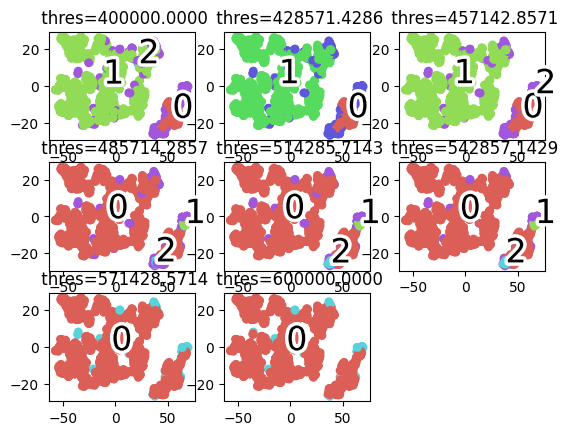

In [62]:

for i, thres in enumerate(np.linspace(400000, 600000, 8)):
    dbscan = DBSCAN(eps=thres, min_samples=11, metric='euclidean')
    labels = dbscan.fit_predict(df)
    _plot_kmean_scatter(tsne_results, labels, gs[i], thres)

In [15]:
labels

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)